<a href="https://colab.research.google.com/github/avinash9-7/Credit-Fraud-Detection/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle (2).json
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          
(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


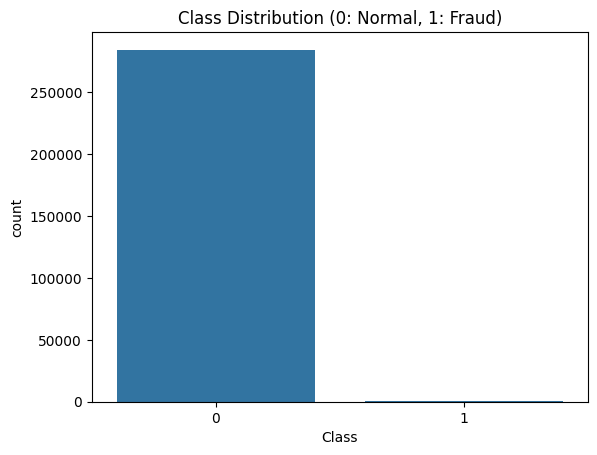

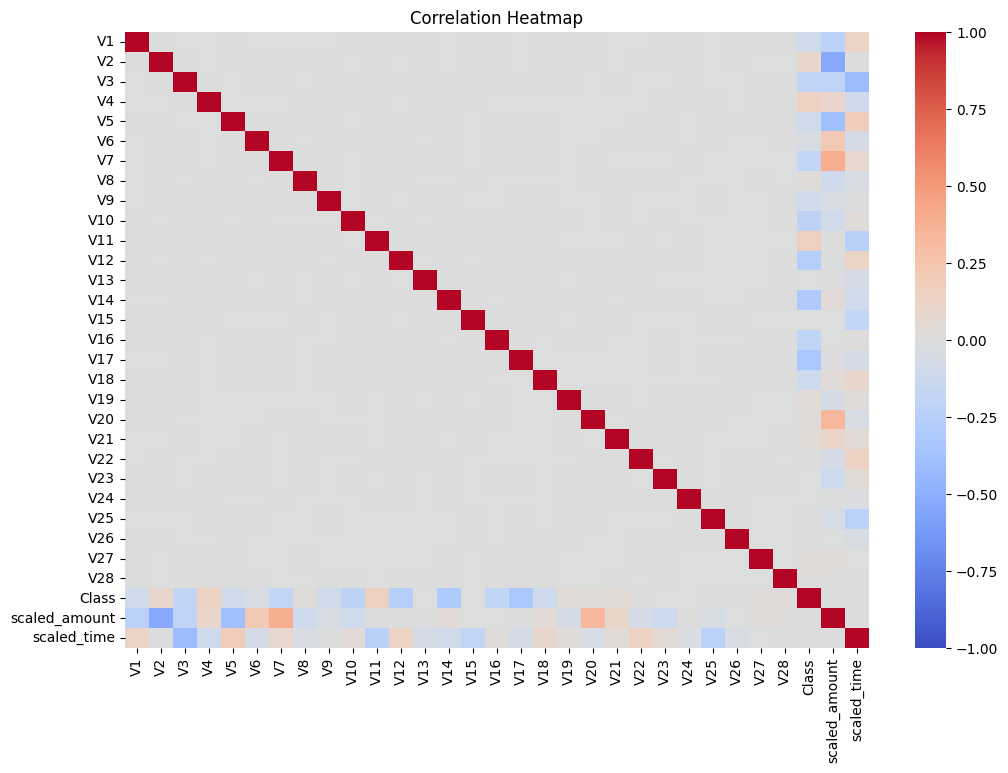

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.22      0.27      0.24       492

    accuracy                           1.00    284807
   macro avg       0.61      0.64      0.62    284807
weighted avg       1.00      1.00      1.00    284807

Confusion Matrix:
[[283831    484]
 [   357    135]]


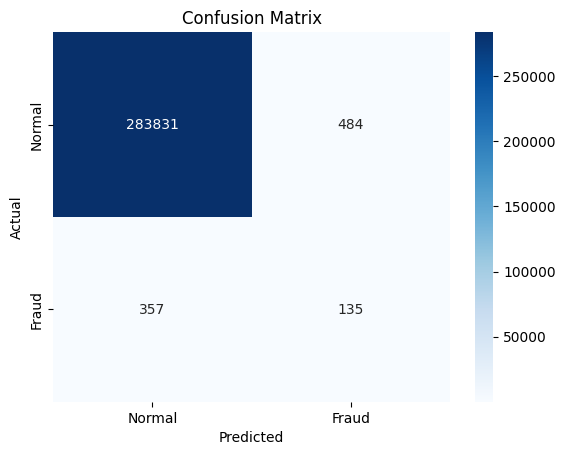

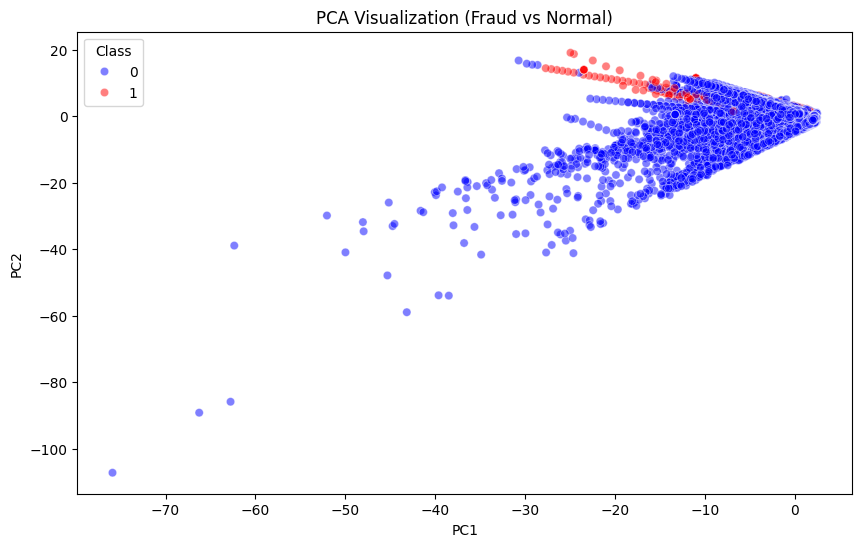

In [ ]:
# Step 0: Install Kaggle if needed
!pip install kaggle -q

# Step 1: Upload kaggle.json (API token)
from google.colab import files
files.upload()  # Upload kaggle.json

# Step 2: Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download and unzip the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip -o creditcardfraud.zip

# Step 4: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA

# Step 5: Load the data
df = pd.read_csv('creditcard.csv')

# Step 6: Explore class distribution
print(df.shape)
print(df['Class'].value_counts())

sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.show()

# Step 7: Preprocess data - scale 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Step 8: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# Step 9: Prepare training and testing sets
X_train = df[df['Class'] == 0].drop('Class', axis=1)  # Only normal data
X_test = df.drop('Class', axis=1)
y_test = df['Class'].values

# Step 10: Train Isolation Forest
model = IsolationForest(contamination=0.0017, random_state=42)
model.fit(X_train)

# Step 11: Predict
y_pred = model.predict(X_test)
y_pred = [1 if x == -1 else 0 for x in y_pred]

# Step 12: Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 13: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

pca = PCA(n_components=2)
components = pca.fit_transform(X_test)
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['Class'] = y_test

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('PCA Visualization (Fraud vs Normal)')
plt.show()
